In [8]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('df1_loan.csv', index_col =0)

del df["Loan_ID"]

df["Total_Income"]=df["Total_Income"].str.replace("$","")
df["Total_Income"]=df["Total_Income"].apply(pd.to_numeric)

df["Dependents"]=df["Dependents"].str.replace('+','')
df["Dependents"]=df["Dependents"].apply(pd.to_numeric)


df["Self_Employed"] = df["Self_Employed"].astype('category').cat.codes
df["Gender"] = df["Gender"].astype('category').cat.codes
df["Married"] = df["Married"].astype('category').cat.codes
df["Education"] = df["Education"].astype('category').cat.codes
df["Property_Area"] = df["Property_Area"].astype('category').cat.codes
df["Loan_Status"] = df["Loan_Status"].astype('category').cat.codes


df = df.dropna()

def fam_size():
    df["Familiy_Size"] = []
    for i in df["Married"]:
        if i == 1:
            df["Familiy_Size"].append(1)
        else:
            df["Familiy_Size"].append(0)
    # Now just need to loop and add dependents to each one. sorry, its 2pm and im gay

def get_features_target():

    target_column = f"Loan_Status"
    target = df[target_column].dropna()

    df2 = df.copy()
    del df2[target_column]

        
    scaler = StandardScaler()
    scaler.fit(df2)
    df2 = scaler.transform(df2)

    return df2, target



# features, target = get_features_target()


def k_best_features(k, features, target):
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)
  
    selector = SelectKBest(f_regression, k = k)
    selector.fit(X_train, y_train)

    selected = selector.get_support()
  
    columns = []
    for i in range(len(selected)):
        if selected[i]:
            columns.append(df.columns[i])

    return columns

features, target = get_features_target()
print(k_best_features(7, features, target))


['Gender', 'Married', 'Education', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


<ipython-input-8-203d7726c819>:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Total_Income"]=df["Total_Income"].str.replace("$","")
<ipython-input-8-203d7726c819>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df["Dependents"]=df["Dependents"].str.replace('+','')


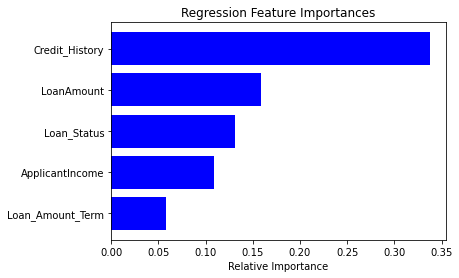

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# top features for regression model
target_reg = df["Loan_Status"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, target_reg, random_state=1000)

model = RandomForestRegressor(max_depth=10, random_state=1000)
model.fit(X_train_reg,y_train_reg)

reg_columns = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-5:]  # top 5 features
plt.title('Regression Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [reg_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
data_rows = []


total_score = 0
for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    
    #sklearnSVC = SVC(kernel = "poly", max_iter=10000).fit(X_train, y_train)
    #sklearnSVC = LinearSVC(max_iter=10000).fit(X_train, y_train)
    sklearnSVC = LogisticRegression(max_iter=10000).fit(X_train, y_train)

    #coef, intercept = sklearnSVC.coef_, sklearnSVC.intercept_
    #print(coef, intercept)
    y_pred_train = sklearnSVC.predict(X_train)
    y_pred_test = sklearnSVC.predict(X_test)
    train_error = np.sum(y_pred_train != y_train) / (1.0 * X_train.shape[0])
    test_error = np.sum(y_pred_test != y_test) / (1.0 * X_test.shape[0])
    score = sklearnSVC.score(X_test, y_test)
    total_score += score
    data_rows.append({
            "score": score,
            "train_acc": (1-train_error),
            "test_acc": (1-test_error)
        })

test_df = pd.DataFrame(data_rows)
print(total_score/15, test_df)


0.8203174603174606        score  train_acc  test_acc
0   0.847619   0.789809  0.847619
1   0.866667   0.786624  0.866667
2   0.838095   0.789809  0.838095
3   0.790476   0.815287  0.790476
4   0.771429   0.818471  0.771429
5   0.838095   0.802548  0.838095
6   0.885714   0.773885  0.885714
7   0.800000   0.815287  0.800000
8   0.780952   0.821656  0.780952
9   0.780952   0.812102  0.780952
10  0.857143   0.789809  0.857143
11  0.809524   0.805732  0.809524
12  0.828571   0.802548  0.828571
13  0.809524   0.802548  0.809524
14  0.800000   0.808917  0.800000


In [ ]:
import numpy as np 
def plot_NN_data(x_train, y_train):
    x_t0, x_t1 = x_train[np.where(y_train == 0)[0]], x_train[np.where(y_train == 1)[0]]
    plt.scatter(x_t0[:,0], x_t0[:,1], color='blue', label='class c:-1', marker='s')
    plt.scatter(x_t1[:,0], x_t1[:,1], color='red', label='class c:1', marker="o")

    plt.legend()
    plt.xlabel('x1')
    plt.ylabel('x2')
    ax = plt.gca()
    ax.autoscale(False)
    plt.show()

#sns.pairplot(df, hue='Loan_Status')
#f = features["ApplicantIncome"].zip(features["Gender"])
#f
#plot_NN_data(f, target)

